In [2]:
# Relevant Package Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [34]:
#Import Data from cluster.csv
db = pd.read_csv('cluster.csv')
db

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
1,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
2,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
3,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
4,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15584,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15585,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15586,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4
15587,nochurn,Mr. Gregory Moran,yes,1992.0,leisure,double,5155,4,3,4,...,5,4,5,5,2,5,4,3,4,5


In [81]:
#Import Data from cluster.csv
db = pd.read_csv('cluster.csv')
db[db.duplicated(keep = False)]
db.drop_duplicates(inplace = True)
# Changing NA values to median value of year and converting to int32
db['Year_Birth'] = db['Year_Birth'].fillna(db['Year_Birth'].median()).astype(int).astype(np.int16)
db['RewardPoints'] = db['RewardPoints'].fillna(db['RewardPoints'].median()).astype(np.int16)
# Converting every column that is int64 to int8 for performance issues
db.iloc[:,(db.dtypes=='int64').values] = db.iloc[:,(db.dtypes=='int64').values].astype(np.int8)
# Change longevity y to yes
db['Longevity'] = db['Longevity'].replace('y','yes')
# Churn, Longevity can be boolean for performence issues
db['Longevity']=db['Longevity'].map({'yes': True, 'no': False})
db['Churn']=db['Churn'].map({'churn': True, 'nochurn': False})
db['TypeTravel']=db['TypeTravel'].map({'business': True, 'leisure': False})
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15586 entries, 0 to 15588
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Churn              15586 non-null  bool  
 1   Name               15586 non-null  object
 2   Longevity          15586 non-null  bool  
 3   Year_Birth         15586 non-null  int16 
 4   TypeTravel         15586 non-null  bool  
 5   RoomType           15586 non-null  object
 6   RewardPoints       15586 non-null  int16 
 7   Comfort            15586 non-null  int8  
 8   ReceptionSchedule  15586 non-null  int8  
 9   FoodDrink          15586 non-null  int8  
 10  Location           15586 non-null  int8  
 11  Wifi               15586 non-null  int8  
 12  Amenities          15586 non-null  int8  
 13  Staff              15586 non-null  int8  
 14  OnlineBooking      15586 non-null  int8  
 15  PriceQuality       15586 non-null  int8  
 16  RoomSpace          15586 non-null  int8 

In [116]:
def describe(db, stats):
    d = db.describe()
    return d.append(db.reindex(d.columns, axis = 1).agg(stats))

describe(db, ['skew', 'mad', 'kurt']).T

,count,mean,std,min,25%,50%,75%,max,skew,mad,kurt
Year_Birth,15586.0,1981.696779,15.084697,1936.0,1970.0,1981.0,1994.00,2014.0,-0.001992,12.501188,-0.701207
RewardPoints,15586.0,5022.418581,1027.940126,409.0,4445.0,5088.0,5648.75,6950.0,-0.453744,794.589753,0.260162
Comfort,15586.0,2.841332,1.388541,0.0,2.0,3.0,4.00,5.0,-0.100806,1.169587,-0.935490
ReceptionSchedule,15586.0,2.997049,1.519035,0.0,2.0,3.0,4.00,5.0,-0.260518,1.283631,-1.077415
FoodDrink,15586.0,2.844412,1.436937,0.0,2.0,3.0,4.00,5.0,-0.123543,1.211755,-0.967006
Location,15586.0,2.985821,1.299438,1.0,2.0,3.0,4.00,5.0,-0.050057,1.058767,-1.076634
Wifi,15586.0,3.244963,1.327064,0.0,2.0,3.0,4.00,6.0,-0.171105,1.147335,-1.111382
Amenities,15586.0,3.374631,1.352419,0.0,2.0,4.0,4.00,5.0,-0.599424,1.145487,-0.540790
Staff,15586.0,3.506288,1.319625,1.0,3.0,4.0,5.00,5.0,-0.554468,1.133386,-0.859138
OnlineBooking,15586.0,3.454190,1.310401,0.0,2.0,4.0,5.00,5.0,-0.472109,1.133048,-0.931961


In [114]:
db.loc[:,'Comfort':'BarService'].mode()

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,3,4,3,3,4,4,4,4,4,4,4,4,4,4


<AxesSubplot:xlabel='Wifi', ylabel='Count'>

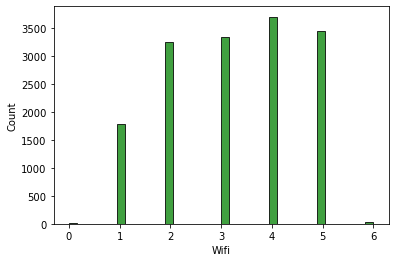

In [47]:
sns.histplot(db['Wifi'], color="g")

In [80]:
db[db['Wifi']==6]['TypeTravel'].value_counts(normalize=True)

business    0.689978
leisure     0.310022
Name: TypeTravel, dtype: float64

In [75]:
db[['Wifi','TypeTravel']].value_counts()

Wifi  TypeTravel
4     business      2581
5     business      2399
3     business      2319
2     business      2268
1     business      1157
4     leisure       1122
5     leisure       1046
3     leisure       1028
2     leisure        977
1     leisure        635
6     business        24
0     leisure         12
6     leisure         12
0     business         6
dtype: int64

In [93]:
db[db.loc[:,'Comfort':'BarService'].apply(lambda x:min(x)==max(x),1)]

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
1548,False,Mr. Marcus Burns,True,1981,True,single,5289,4,4,4,...,4,4,4,4,4,4,4,4,4,4
6707,True,Ms. Anna Caldwell,True,2004,True,single,1689,4,4,4,...,4,4,4,4,4,4,4,4,4,4
15259,False,Mr. Randy Robbins,True,1976,True,single,6699,5,5,5,...,5,5,5,5,5,5,5,5,5,5


<AxesSubplot:>

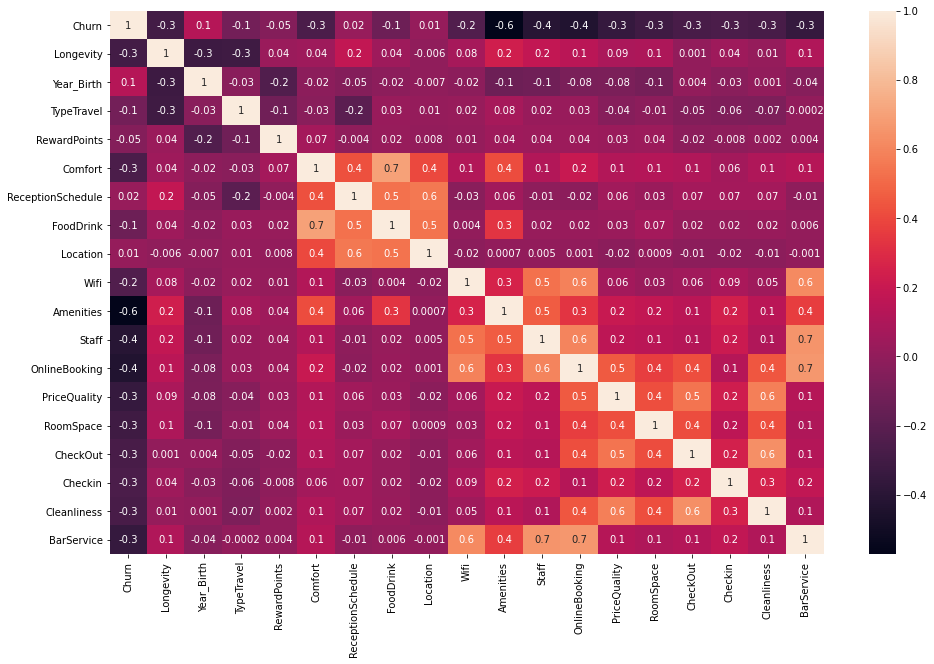

In [82]:
bookme_corr = db.corr(method = 'spearman') # use spearman correlation

# unsupervised learning (k-means) - columns with high correlation (> 0.7 approximately) -> some of them should be removed

figure = plt.figure(figsize=(16,10))
sns.heatmap(bookme_corr, annot=True, fmt = '.1g')

#### Exploration

- Longevity with yes, no, y: change y to yes.
- Wifi has values of 6: the percentage of people who choose 6 among leisure/business (31% vs 69%) is in line with the general percentage of leisure/business (33% vs 67%). 0 and 6 are the two less choosen options. The order of prefered choice is the same for leisure and business.
- Changing the data type of Churn, Longevity and TypeTravel in order to correlate with the other variables shows only Churn-Amenities has a correlation greater than abs(0.5) --> value -0.6. Churn also has an abs(0.4) correlation with Staff and OnlineBooking. The other two never pass beyond abs(0.3).
- There are 3 rows that gave the same classification to every aspect (1548, 6707, 15259), two gave all 4 and the other all 5. All roomtype single, business and longevity = yes.




#### To Explore
- From the start, the only Attribute with missing non-null values is Year_Birth. For storytelling purposes, we should discuss how to explore the narrative here for median vs mode vs mean

- Include in storytelling the type of clients that use all 0 or all 5. Also, check the type of clients that use 1 instead of 0, does that make sense? Is check in and Check out necessary?

- Check how many repeat visits do we have from the potential customers. (Name)


































